# 线性代数基础知识：矩阵

- 掌握矩阵的概念
- 了解矩阵和线性变换之间的关系
- 掌握Python中矩阵的表示方法
- 掌握矩阵的一些基本运算

## 什么是矩阵

- 数学上，一个𝑚×𝑛的矩阵是一个由𝑚行𝑛列元素排列成的矩形阵列
![矩阵](../images/scipy_421.png)

- 矩阵A第i行第j列的元素记为$𝐴_𝑖𝑗$

## 矩阵的基本运算

- 加（减）法：$(𝐴±𝐵)_𝑖𝑗=𝐴_𝑖𝑗+𝐵_𝑖𝑗$
![加法](../images/scipy_422.png)

- 数乘：$(𝑐𝐴)_𝑖𝑗=𝑐𝐴_𝑖𝑗$
![数乘](../images/scipy_423.png)

- 转置：$(𝐴^𝑇 )_𝑖𝑗=𝐴_𝑗𝑖$
![转置](../images/scipy_424.png)

## 矩阵乘法

- 两个矩阵相乘，只有在第一个矩阵的列数和第二个矩阵的行数相同才有定义
- 若A为$𝑚×𝑛$矩阵，B为$𝑛×𝑝$矩阵，则他们的乘积AB为$𝑚×𝑝$矩阵
$(𝐴𝐵)_𝑖𝑗=∑_(𝑘=1)^𝑛=𝑎_𝑖𝑘 𝑏_𝑘𝑗 =𝑎_𝑖1 𝑏_1𝑗+𝑎_𝑖2 𝑏_2𝑗+⋯+𝑎_𝑖𝑛 𝑏_𝑛𝑗$
- 例如
![矩阵乘法](../images/scipy_425.png)
- 向量可以当作是一个只有一列的矩阵进行相乘，得到新的向量

- 矩阵乘法满足下面这些规律
    - 结合律：$(𝐴𝐵)𝐶=𝐴(𝐵𝐶)$
    - 左分配律：$(𝐴+𝐵)𝐶=𝐴𝐶+𝐵𝐶$
    - 右分配律：$𝐴(𝐵+𝐶)=𝐴𝐵+𝐴𝐶$
    - 数乘的结合律：$𝑐(𝐴𝐵)=(𝑐𝐴)𝐵=𝐴(𝑐𝐵)$
    - 转置与矩阵乘法：$(𝐴𝐵)^𝑇=𝐵^𝑇 𝐴^𝑇$
- 矩阵乘法不满足交换律
    - 若矩阵$A$和$B$的乘积$AB$存在，$BA$不一定存在
    - 即使$BA$存在，通常$𝐴𝐵≠𝐵𝐴$
    - 如
    ![矩阵乘法2](../images/scipy_426.png)

## 矩阵的直观解释

- 根据矩阵与向量的乘法，矩阵可以理解为一种变换，它将一个向量变换成另外一个向量
![矩阵直观解释](../images/scipy_427.png)

In [1]:
import numpy as np

In [2]:
# 创建一个 2x3 的矩阵
x1 = np.array([[1,2,3], [4,3,2]])
x1

array([[1, 2, 3],
       [4, 3, 2]])

In [3]:
x2 = np.array([[0,1,0], [2,3,1]])

In [4]:
# 矩阵加法
x1 + x2

array([[1, 3, 3],
       [6, 6, 3]])

In [5]:
# 矩阵减法
x1 - x2

array([[1, 1, 3],
       [2, 0, 1]])

In [6]:
# 数乘
2 * x1

array([[2, 4, 6],
       [8, 6, 4]])

In [7]:
# 转置
x1.T

array([[1, 4],
       [2, 3],
       [3, 2]])

In [8]:
# 矩阵乘法
x1 = np.array([[1,0,2], [-1,3,1]])
x2 = np.array([[3,1], [2,1], [1,0]])
x1.dot(x2)   # 或 np.dot(x1, x2) 或 np.matmul(x1, x2)

array([[5, 1],
       [4, 2]])

In [9]:
np.dot(x1, x2)

array([[5, 1],
       [4, 2]])

In [10]:
np.matmul(x1, x2)

array([[5, 1],
       [4, 2]])

In [11]:
# 矩阵乘向量
# 为了避免计算和理解的不一致，向量统一用只有一列的二维数组表示
v = np.array([3,2,1]).reshape((-1,1))
x1.dot(v)

array([[5],
       [4]])

## 矩阵是一种变换

In [12]:
import matplotlib
from matplotlib import pyplot as plt

# 定义作图函数

# 画一个网格
def display_mat(plt, vmat, color='b'):
    for i in range(vmat.shape[0]):
        plt.plot([vmat[i, 0, 0], vmat[i, -1, 0]], [vmat[i, 0, 1], vmat[i, -1, 1]], color=color)
    for j in range(vmat.shape[1]):
        plt.plot([vmat[0, j, 0], vmat[-1, j, 0]], [vmat[0, j, 1], vmat[-1, j, 1]], color=color)

# 画两个网格，蓝色=变换前的网格，绿色=变换后的网格
# 参数
# mat: 变换矩阵
# x: 网格中x的取值
# y: 网格中y的取值
# 返回值
# z: 变换前的网格
# za: 变换后的网格
def display(mat, x=None, y=None):
    x = np.arange(-2, 8, 1) if x is None else x
    y = np.arange(-2, 8, 1) if y is None else y
    z = np.stack(np.meshgrid(x, y), axis=2)
    display_mat(plt, z)
    za = np.empty_like(z, dtype=np.float_)
    for i in range(z.shape[0]):
        for j in range(z.shape[1]):
            za[i, j, :] = mat.dot(z[i, j, :].reshape((-1,1))).ravel()
    display_mat(plt, za, color='g')
    return z, za

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


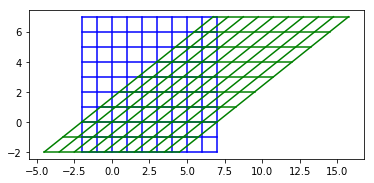

In [13]:
# 推移
A = np.array([[1, 1.25], [0, 1]])
z, za = display(A)
plt.axes().set_aspect('equal')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


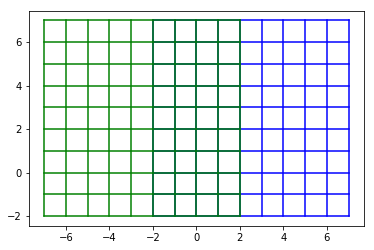

In [14]:
# 水平镜像
A = np.array([[-1, 0], [0, 1]])
z, za = display(A)
plt.axes().set_aspect('equal')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


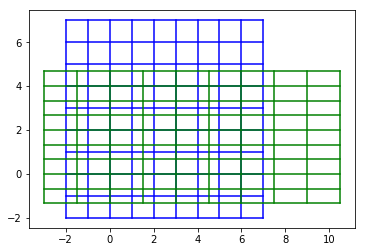

In [15]:
# 挤压
A = np.array([[3.0/2, 0], [0, 2.0/3]])
z, za = display(A)
plt.axes().set_aspect('equal')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


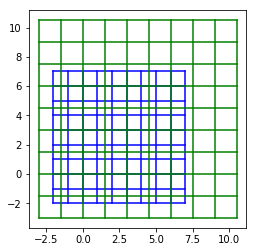

In [16]:
# 伸缩
A = np.array([[3.0/2, 0], [0, 3.0/2]])
z, za = display(A)
plt.axes().set_aspect('equal')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


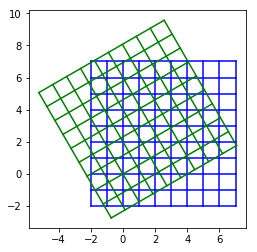

In [17]:
# 旋转
A = np.array([[np.cos(np.pi/6.0), -np.sin(np.pi/6.0)], [np.sin(np.pi/6.0), np.cos(np.pi/6.0)]])
z, za = display(A)
plt.axes().set_aspect('equal')
plt.show()